In [2]:
import tensorflow as tf

# In TensorFlow 2.x, eager execution is enabled by default, so no need for tf.enable_eager_execution()
print("Eager execution is enabled:", tf.executing_eagerly())
!pip install stable_baselines3




Eager execution is enabled: True
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 24.0 MB/s eta 0:00:00


In [3]:
!pip install gym_anytrading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.3 MB/s eta 0:00:00


In [4]:
# Ensure compatibility with Stable-Baselines3
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import gymnasium as gym
import gym_anytrading
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
!mkdir data

In [8]:
# Load dataset
df = pd.read_csv(r"/Download Data - STOCK_US_XNYS_GME.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-10,32.50,32.94,31.40,32.31,"7,068,203"
2025-01-08,32.97,33.37,32.41,32.96,"6,319,956"
2025-01-07,32.80,34.40,31.71,33.37,"13,360,660"
2025-01-06,31.70,33.49,30.76,32.82,"12,609,410"
2025-01-03,30.80,32.14,30.57,31.65,"7,461,759"


In [10]:
import pandas as pd

file_path = r'/Download Data - STOCK_US_XNYS_GME.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Print the column names to debug
print("Column names in the CSV:", df.columns)


Column names in the CSV: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [11]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Removes leading/trailing spaces


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,object


In [13]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-10,32.50,32.94,31.40,32.31,"7,068,203"
2025-01-08,32.97,33.37,32.41,32.96,"6,319,956"
2025-01-07,32.80,34.40,31.71,33.37,"13,360,660"
2025-01-06,31.70,33.49,30.76,32.82,"12,609,410"
2025-01-03,30.80,32.14,30.57,31.65,"7,461,759"


In [14]:
# Create the trading environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)


In [15]:
dir(env)  # Lists all attributes and methods of the `env` object.


['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_action_space',
 '_cached_spec',
 '_disable_render_order_enforcing',
 '_has_reset',
 '_is_protocol',
 '_metadata',
 '_np_random',
 '_np_random_seed',
 '_observation_space',
 '_saved_kwargs',
 'action_space',
 'class_name',
 'close',
 'env',
 'get_wrapper_attr',
 'has_reset',
 'has_wrapper_attr',
 'metadata',
 'np_random',
 'np_random_seed',
 'observation_space',
 'render',
 'render_mode',
 'reset',
 'set_wrapper_attr',
 'spec',
 'step',
 'unwrapped',
 'wrapper_spec']

In [16]:
env.action_space

Discrete(2)

info {'total_reward': 1.6500015258789062, 'total_profit': 0.9465845291249817, 'position': <Positions.Long: 1>}


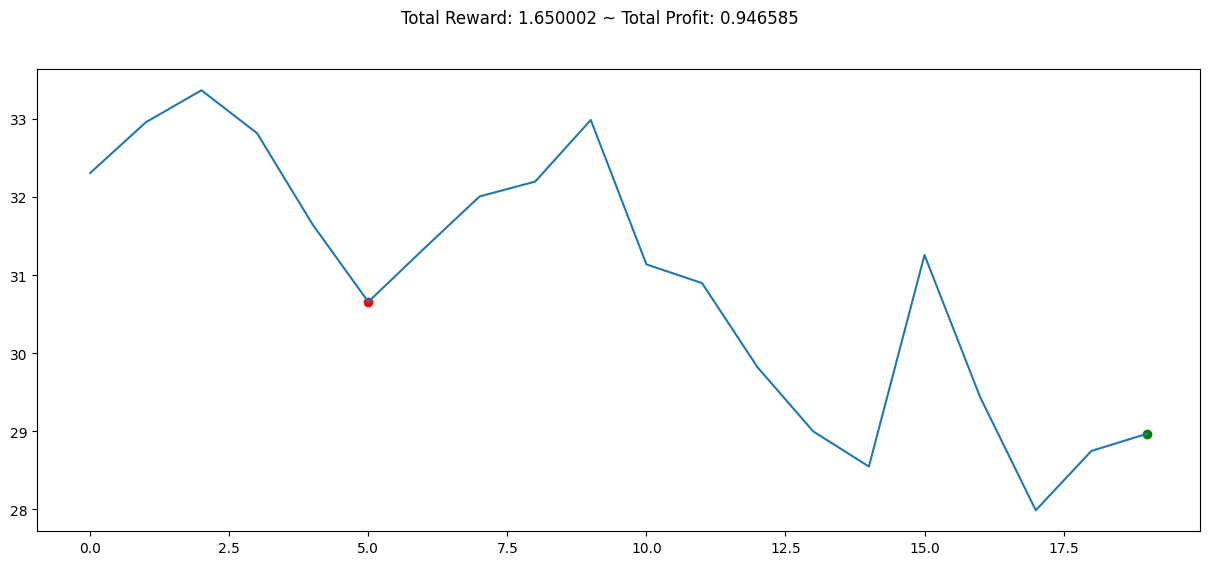

In [17]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)  # Update here
    if done or truncated:  # Check both done and truncated
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render()
plt.show()


In [19]:
print(dir(env))
print(env.metadata)


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_indices', '_get_target_envs', '_obs_from_buf', '_options', '_reset_options', '_reset_seeds', '_save_obs', '_seeds', 'action_space', 'actions', 'buf_dones', 'buf_infos', 'buf_obs', 'buf_rews', 'close', 'env_is_wrapped', 'env_method', 'envs', 'get_attr', 'get_images', 'getattr_depth_check', 'keys', 'metadata', 'num_envs', 'observation_space', 'render', 'render_mode', 'reset', 'reset_infos', 'seed', 'set_attr', 'set_options', 'step', 'step_async', 'step_wait', 'unwrapped']
{'render_modes': ['human'], 'render_fps': 3}


In [21]:
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym

# Define the environment maker
def env_maker():
    return gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

# Create a vectorized environment
env = DummyVecEnv([env_maker])

# Interact with the environment
obs = env.reset()

while True:
    action = [env.action_space.sample()]
    result = env.step(action)

    # Check the number of values returned
    if len(result) == 5:  # Newer API with `truncated`
        obs, rewards, dones, truncateds, infos = result
        done_flag = dones[0] or truncateds[0]
    elif len(result) == 4:  # Older API without `truncated`
        obs, rewards, dones, infos = result
        done_flag = dones[0]
    else:
        raise ValueError("Unexpected return format from env.step(action)")

    if done_flag:
        print("Episode finished")
        break

env.close()



Episode finished


In [23]:
pip install sb3-contrib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 2.2 MB/s eta 0:00:00


In [25]:
from stable_baselines3 import A2C

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)


Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 288      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.527   |
|    explained_variance | 0.0359   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.801    |
|    value_loss         | 2.15     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 352      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.653   |
|    explained_variance | 0.0278   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -1.29    |
|    value_loss      

KeyboardInterrupt: 

In [39]:
result = env.reset()
if isinstance(result, tuple):
    obs, info = result
else:
    obs = result
    info = None


In [41]:
pip uninstall gym -y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2


In [44]:
import numpy as np
import gymnasium as gym
import gym_anytrading  # Ensure this is installed

# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(90, 110), window_size=5)

# Reset the environment
obs, info = env.reset()  # In newer versions, reset() returns (obs, info)

while True:
    # Add batch dimension to observation
    obs = obs[np.newaxis, ...]

    # Predict the action (assuming `model` is a trained agent)
    action, _states = model.predict(obs)

    # Take a step in the environment
    obs, rewards, done, truncated, info = env.step(action)

    # Check if the episode has ended
    if done or truncated:
        print("info:", info)
        break


info: {'total_reward': -1.9754048585891724, 'total_profit': 0.01729890254114928, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


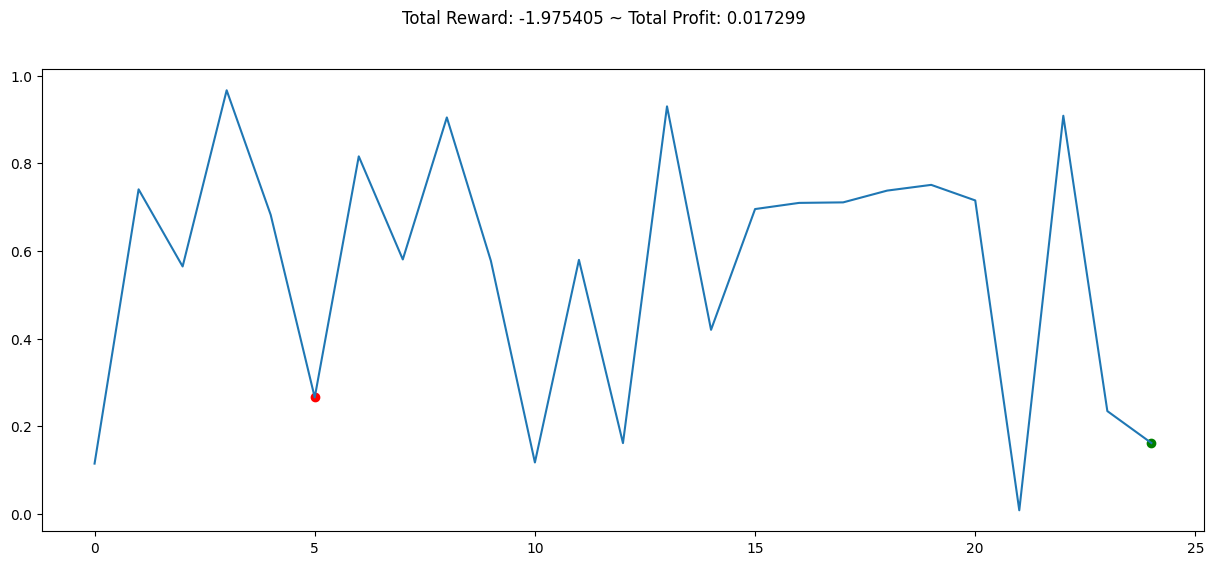

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env.render()
plt.show()

In [33]:
import gym
from gym_anytrading.envs import StocksEnv

# Register the environment manually
gym.register(
    id='stocks-v0',
    entry_point='gym_anytrading.envs:StocksEnv',
)


import tensorflow as tf

# In TensorFlow 2.x, eager execution is enabled by default, so no need for tf.enable_eager_execution()
print("Eager execution is enabled:", tf.executing_eagerly())

# Ensure compatibility with Stable-Baselines3
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import gym
import gym_anytrading
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load dataset
df = pd.read_csv('data/gmedata.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create the trading environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

def visualize_environment(env):
    """Visualize the environment's performance."""
    state = env.reset()
    while True:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        if done:
            print("info", info)
            break

    plt.figure(figsize=(15, 6))
    plt.cla()
    env.render_all()
    plt.show()

# Visualize the environment
visualize_environment(env)

# Use Stable-Baselines3 for the reinforcement learning model
env = make_vec_env(lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5), n_envs=1)

model = A2C('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("a2c_gme_trading")

# Load the model
model = A2C.load("a2c_gme_trading")

# Test the model
env = gym.make('stocks-v0', df=df, frame_bound=(90, 150), window_size=5)
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()
